# Pre-trained Model Demo

### Load and Preprocess Image

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [0]:
img = image.load_img('merlion-224.jpg',target_size=(224,224))

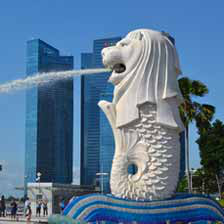

In [0]:
img

In [0]:
x = image.img_to_array(img)

In [0]:
x.shape

(224, 224, 3)

In [0]:
import numpy as np
x = np.expand_dims(x,axis=0)

In [0]:
x.shape

(1, 224, 224, 3)

### Load Model

In [0]:
model = VGG16()

553467904/553467096 [==============================] - 10s 0us/step


In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Make prediction and decode

In [0]:
predictions = model.predict(x)

In [0]:
predictions

array([[1.96709394e-07, 1.21947141e-05, 1.28856209e-06, 4.03260202e-07,
        1.40278189e-06, 1.45042543e-06, 2.02183770e-07, 9.22309300e-06,
        1.68007296e-06, 2.08827009e-06, 7.73114778e-07, 5.32349395e-06,
        3.80048477e-05, 4.47630981e-07, 6.77247681e-06, 4.48758158e-07,
        3.47903665e-07, 3.84450095e-06, 1.18173688e-07, 3.45986382e-06,
        7.97046553e-08, 1.60295731e-05, 1.14458430e-06, 1.46525381e-05,
        9.64144147e-06, 5.42798837e-08, 1.03933651e-07, 1.72035840e-07,
        1.00580536e-07, 3.81373326e-07, 1.29767841e-07, 8.23283301e-07,
        6.16680666e-07, 2.47369684e-07, 6.60307080e-07, 2.47615390e-07,
        2.95921200e-06, 3.40604487e-08, 4.11506051e-07, 7.67086647e-07,
        2.96099472e-07, 7.41551958e-07, 7.23545028e-08, 7.89569981e-07,
        9.12520832e-08, 7.39073442e-08, 2.81270616e-07, 2.87848911e-06,
        5.30296234e-08, 2.10724327e-08, 1.97729165e-07, 1.38455624e-04,
        3.31924184e-07, 4.61776068e-07, 1.53698039e-07, 3.381349

In [0]:
classes = decode_predictions(predictions,top=3)

40960/35363 [==================================] - 0s 0us/step


In [0]:
classes

[[('n02966193', 'carousel', 0.27736825),
  ('n03388043', 'fountain', 0.2551474),
  ('n03124043', 'cowboy_boot', 0.08624962)]]

# Transfer Learning

### Import the data

In [2]:
from tensorflow import keras

URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [0]:
PATH = path_to_zip.replace('.zip', '')

In [0]:
train_dir = PATH + '/train'
validation_dir = PATH + '/validation'

### Step 1: Data Augmentation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
val_image_generator = ImageDataGenerator(rescale=1./255)

In [6]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 128

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Step 2: Pre-Trained Base Model

In [7]:
from tensorflow.keras.applications import MobileNet
base_model=MobileNet(weights='imagenet') 

17227776/17225924 [==============================] - 0s 0us/step


In [8]:
len(base_model.layers)

93

In [9]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:
from tensorflow.keras.applications import MobileNet
base_model=MobileNet(weights='imagenet', include_top=False) 

17227776/17225924 [==============================] - 0s 0us/step


In [11]:
len(base_model.layers)

87

In [0]:
# base_model.summary()

### Step 3: Add new layer

In [0]:
# from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
# from tensorflow.keras.models import Model

# x=base_model.output
# x=GlobalAveragePooling2D()(x) # Flatten
# x=Dense(1024,activation='relu')(x) 
# x=Dense(1024,activation='relu')(x) 
# x=Dense(512,activation='relu')(x) 
# preds=Dense(1,activation='sigmoid')(x) 

# model=Model(inputs=base_model.input,outputs=preds)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
# model.summary()

In [16]:
model.layers[-5:]

In [0]:
for layer in model.layers[:-5]:
    layer.trainable=False

# # Optional
# for layer in model.layers[-5:]:
#     layer.trainable=True

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 4,869,057
Trainable params: 1,640,193
Non-trainable params: 3,228,864
______________________________________

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Step 4: Train model

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_data_gen,
    steps_per_epoch = 2000//BATCH_SIZE,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps = 1000//BATCH_SIZE,
    verbose=1, 
    callbacks = [EarlyStopping(monitor='val_loss', 
                               patience=2, 
                               verbose=2, 
                               restore_best_weights = True)]
)

Epoch 1/15
15/15 [==============================] - 17s 1s/step - loss: 0.6614 - accuracy: 0.7901 - val_loss: 0.1578 - val_accuracy: 0.9319
Epoch 2/15
15/15 [==============================] - 17s 1s/step - loss: 0.2427 - accuracy: 0.8926 - val_loss: 0.1058 - val_accuracy: 0.9576
Epoch 3/15
15/15 [==============================] - 17s 1s/step - loss: 0.1882 - accuracy: 0.9167 - val_loss: 0.0723 - val_accuracy: 0.9688
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.1856 - accuracy: 0.9204 - val_loss: 0.0590 - val_accuracy: 0.9732
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.1513 - accuracy: 0.9343 - val_loss: 0.0522 - val_accuracy: 0.9766
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.1415 - accuracy: 0.9391 - val_loss: 0.0675 - val_accuracy: 0.9676
Epoch 7/15
15/15 [==============================] - 15s 1s/step - loss: 0.1513 - accuracy: 0.9327 - val_loss: 0.0951 - val_accuracy: 0.9576
Epoch 00007: early s

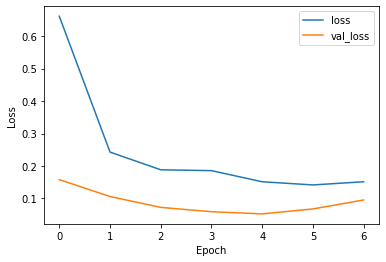

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model.evaluate(val_data_gen, steps = 1000//BATCH_SIZE)

7/7 [==============================] - 2s 313ms/step - loss: 0.0575 - accuracy: 0.9725


[0.05749263986945152, 0.9724770784378052]

In [0]:
preds = model.predict(val_data_gen, steps = 1000//BATCH_SIZE)

In [25]:
preds[:10]

array([[9.9857318e-01],
       [5.4600332e-03],
       [1.6701453e-08],
       [4.2959076e-05],
       [1.0604542e-06],
       [8.3526957e-06],
       [2.9627336e-05],
       [7.6869524e-01],
       [2.9364661e-03],
       [6.4943100e-07]], dtype=float32)

In [28]:
# Numpy
preds.round().flatten().astype(int)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,

#### Test the Dog Image

57344/49553 [==================================] - 0s 0us/step


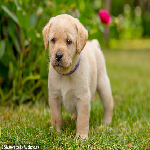

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image1.jpg',
                              'https://i.dailymail.co.uk/1s/2019/11/23/09/21370544-7717313-image-a-1_1574501083030.jpg')
                              # 'https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img.shape

(150, 150, 3)

In [0]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [0]:
result = model.predict(img)
result

array([[1.]], dtype=float32)

In [0]:
round(result[0][0])

1.0

#### Test the Cat Image

65536/60717 [================================] - 0s 6us/step


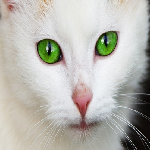

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image10.jpg',
                              # 'https://www.thesprucepets.com/thmb/wd4VS5A5UCHLF0IBG-DsVfrLypk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg')
                              'https://images.all-free-download.com/images/graphicthumb/cat_with_green_eyes_194623.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

In [0]:
result = model.predict(img)
round(result[0][0])

0.0